# Hands-On Machine Learning Project
## Topic 20: Credit Data
### Florian Korn, Vincent Bläske, Dennis Götz

## I. Get the Data
1. Get (download) the data.
2. Convert the data to a format you can easily manipulate (without changing the data itself), e.g. a Pandas
DataFrame.
3. Sample a test set, put it aside, and never look at it (no data snooping!)

In [149]:
# Import libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import scipy.stats

# Attributes
attributes = ['Status of existing checking account', 'Duration in month', 'Credit history', 'Purpose', 'Credit amount', 
           'Savings account/bonds', 'Present employment since', 'Installment rate in percentage of disposable income', 
           'Personal status and sex', 'Other debtors / guarantors', 'Present residence since', 'Property',
           'Age in years', 'Other installment plans', 'Housing', 'Number of existing credits at this bank', 'Job',
           'Number of people being liable to provide maintenance for', 'Telephone', 'foreign worker', 'Credit rating']

# Load original dataset DATA-Format
data = pd.read_csv('german.data', sep=' ', header=None)
data.columns = attributes

# Load numerical dataset CSV-Format
data_num = pd.read_csv('german.data-numeric.csv', sep=';', header=None)

data.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit rating
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [150]:
data.info() #many categorical attributes
#data.hist(bins=50, figsize=(25,12));

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

In [151]:
# Create dictionary with real values to make the DataFrame readable
cat_dict = {# Attribute 1: (qualitative) Status of existing checking account 
            'A11' : '... < 0 DM',
            'A12' : '0 <= ... < 200 DM',
            'A13' : '... >= 200 DM / salary assignments for at least 1 year',
            'A14' : 'no checking account',

            # Attribute 3: (qualitative) Credit history 
            'A30' : 'no credits taken/ all credits paid back duly',
            'A31' : 'all credits at this bank paid back duly',
            'A32' : 'existing credits paid back duly till now',
            'A33' : 'delay in paying off in the past',
            'A34' : 'critical account/ other credits existing (not at this bank)',
            
            # Attribute 4: (qualitative) Purpose 
            'A40' : 'car (new)',
            'A41' : 'car (used)',
            'A42' : 'furniture/equipment',
            'A43' : 'radio/television',
            'A44' : 'domestic appliances',
            'A45' : 'repairs',
            'A46' : 'education',
            'A47' : '(vacation - does not exist?)',
            'A48' : 'retraining',
            'A49' : 'business',
            'A410' : 'others',

            # Attibute 6: (qualitative) Savings account/bonds 
            'A61' : '... < 100 DM',
            'A62' : '100 <= ... < 500 DM',
            'A63' : '500 <= ... < 1000 DM',
            'A64' : '... >= 1000 DM',
            'A65' : 'unknown/ no savings account',

            # Attribute 7: (qualitative) Present employment since 
            'A71' : 'unemployed',
            'A72' : '... < 1 year',
            'A73' : '1 <= ... < 4 years',
            'A74' : '4 <= ... < 7 years',
            'A75' : '... >= 7 years',

            # Attribute 9: (qualitative) Personal status and sex 
            'A91' : 'male : divorced/separated',
            'A92' : 'female : divorced/separated/married',
            'A93' : 'male : single',
            'A94' : 'male : married/widowed',
            'A95' : 'female : single',

            # Attribute 10: (qualitative) Other debtors / guarantors 
            'A101' : 'none',
            'A102' : 'co-applicant',
            'A103' : 'guarantor',

            # Attribute 12: (qualitative) Property 
            'A121' : 'real estate',
            'A122' : 'if not A121 : building society savings agreement/ life insurance',
            'A123' : 'if not A121/A122 : car or other, not in attribute 6',
            'A124' : 'unknown / no property',

            # Attribute 14: (qualitative) Other installment plans 
            'A141' : 'bank',
            'A142' : 'stores',
            'A143' : 'none',

            # Attribute 15: (qualitative) Housing 
            'A151' : 'rent',
            'A152' : 'own',
            'A153' : 'for free',

            # Attribute 17: (qualitative) Job
            'A171' : 'unemployed/ unskilled - non-resident',
            'A172' : 'unskilled - resident',
            'A173' : 'skilled employee / official',
            'A174' : 'management/ self-employed/ highly qualified employee/ officer',

            # Attribute 19: (qualitative) Telephone
            'A191' : 'none',
            'A192' : 'yes, registered under the customers name',

            # Attribute 20: (qualitative) foreign worker 
            'A201' : 'yes',
            'A202' : 'no',

            # Target value: (qualitative) Credit rating
            1 : 'good',
            2 : 'bad'
            }

In [152]:
# Qualitative attributes
cat_attribs = ['Status of existing checking account', 'Credit history', 'Purpose', 'Savings account/bonds', 
                'Present employment since', 'Personal status and sex', 'Other debtors / guarantors', 'Property',
                'Other installment plans', 'Housing', 'Job', 'Telephone', 'foreign worker', 'Credit rating']

# Numerical attributes
num_attribs = list(set(attributes) - set(cat_attribs))

# Copy the data to a new DataFrame
data_values = data.copy()

# Apply the dictionary to all categorical attributes of the new DataFrame to get the real values
data_values[cat_attribs] = pd.DataFrame([data_values[attribute].apply(lambda key: cat_dict[key]) for attribute in cat_attribs]).T

# Save new DataFrame as XLSX
data_values.to_excel('data_values.xlsx')
data_values.head(3)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit rating
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,good
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,bad
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,good


In [153]:
# Create a Test Set (glaube das gehört noch vor dem preprocessing)
train_set, test_set = train_test_split(data_values, train_size=0.8, random_state=0, stratify=data_values['Credit rating'])

# Separate features and target values in train and test set
X_train = np.array(train_set.iloc[:, :20])
y_train = np.array(train_set.iloc[:, -1])
X_test = np.array(test_set.iloc[:, :20])
y_test = np.array(test_set.iloc[:, -1])

print(f'{X_train.shape = }')
print(f'{X_test.shape = }\n')

# Check if training and test set have the same target-value-ratio
print('Ratio of target value good (1) in y_train: {:.2f} %'.format(100*np.sum(y_train == 'good')/len(y_train)))
print('Ratio of target value good (1) in y_test: {:.2f} %'.format(100*np.sum(y_test == 'good')/len(y_test)))

X_train.shape = (800, 20)
X_test.shape = (200, 20)

Ratio of target value good (1) in y_train: 70.00 %
Ratio of target value good (1) in y_test: 70.00 %


In [154]:
from sklearn.preprocessing import OrdinalEncoder

# Handling Text and Categorical Attributes (gleiches Ergebnis wie bei Flo! Nur haben sind die Attribute unterschiedlich nummeriert.)
data_cat = train_set[cat_attribs]

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)

# Replace the categories by numbers
data_encoded = train_set.copy()
data_encoded[cat_attribs] = data_cat_encoded
data_encoded.head(3)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit rating
355,2.0,24,3.0,1.0,1246,0.0,0.0,4,3.0,2.0,...,2.0,23,2.0,1.0,1,3.0,1,0.0,1.0,0.0
661,0.0,12,3.0,1.0,900,4.0,2.0,4,2.0,2.0,...,1.0,23,1.0,1.0,1,1.0,1,0.0,1.0,0.0
300,3.0,6,3.0,1.0,672,0.0,4.0,1,0.0,2.0,...,2.0,54,1.0,1.0,1,2.0,1,1.0,1.0,1.0


In [155]:
# Change features into dummy variables (one-hot-encoding)
#data_values_dummies = pd.get_dummies(data_values)

# Change features into label encoding
def label_encoder(series):
    label_encoder = preprocessing.LabelEncoder()
    encoder_val = np.unique(label_encoder.fit_transform(series))
    dict_index = series.unique()
    dict_label_encoder =  pd.Series(encoder_val, index = dict_index).to_dict()
    return series.map(dict_label_encoder), dict_label_encoder

data_values_dummies = pd.DataFrame()
all_dict = []
for i in range(len(data_values.columns)):
    if data_values.columns[i] in cat_attribs:
        data_values_dummies[i], dict_temp = label_encoder(data_values.iloc[:,i])
        all_dict.append(dict_temp)
    else:
        data_values_dummies[i] = data_values.iloc[:,i]

data_values_dummies.columns = data_values.columns

# # Separate features and target values
# features = np.array(data_values_dummies.iloc[:, :20])
# target_values = np.array(data_values_dummies.iloc[:, -1])

# # Split the dataset into training- and testset (goog/bad ratio stays the same)
# X_train, X_test, y_train, y_test = train_test_split(features, target_values, train_size=0.8, random_state=0, stratify=target_values)

# print(f'{X_train.shape = }')
# print(f'{X_test.shape = }\n')

# # Check if training and test set have the same target-value-ratio
# print('Ratio of target value good (0) in y_train: {:.2f} %'.format(100*np.sum(y_train == 0)/len(y_train)))
# print('Ratio of target value good (0) in y_test: {:.2f} %'.format(100*np.sum(y_test == 0)/len(y_test)))

In [156]:
set(data_values['Purpose'])

{'business',
 'car (new)',
 'car (used)',
 'domestic appliances',
 'education',
 'furniture/equipment',
 'others',
 'radio/television',
 'repairs',
 'retraining'}

**One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values.** (book chapter p.72)

This may be fine in some cases (e.g., for ordered categories such as “bad”, “average”, “good”, and “excellent”), but it is obviously not the case for the purpose column (for example, categories 0 and 1 aren't more similar than categories 0 and 4). To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is "car (new)" (and 0 otherwise), another attribute equal to 1 when the category is "car (used)" (and 0 otherwise), and so on. This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called dummy attributes.


In [157]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)

data_cat_dummies = pd.DataFrame(data_cat_1hot.toarray(),
                                columns=cat_encoder.get_feature_names_out(), #generate new column names with category as suffix to the attribute
                                index=data_cat.index) #keep old indices
data_cat_dummies

# Merge the DataFrames
data_dummies = train_set[num_attribs].copy()
data_dummies = pd.merge(left=data_dummies, right=data_cat_dummies, left_index=True, right_index=True)
data_dummies.head()

,Number of people being liable to provide maintenance for,Number of existing credits at this bank,Duration in month,Installment rate in percentage of disposable income,Present residence since,Credit amount,Age in years,Status of existing checking account_... < 0 DM,Status of existing checking account_... >= 200 DM / salary assignments for at least 1 year,Status of existing checking account_0 <= ... < 200 DM,...,Job_management/ self-employed/ highly qualified employee/ officer,Job_skilled employee / official,Job_unemployed/ unskilled - non-resident,Job_unskilled - resident,Telephone_none,"Telephone_yes, registered under the customers name",foreign worker_no,foreign worker_yes,Credit rating_bad,Credit rating_good
355,1,1,24,4,2,1246,23,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
661,1,1,12,4,2,900,23,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
300,1,1,6,1,4,672,54,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
916,2,1,10,1,2,2848,32,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
294,2,2,48,4,2,7629,46,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


## II. Frame the Problem and Look at the Big Picture
1. Define the objective:<br>
a) Create a model that predicts the target value if a new sample has a 'good' or 'bad' credit rating.<br>
b) Most important features for credit rating? Reliability.<br>
c) Can a SMOTE algorithm improve the performance of the model (balanced dataset)?<br>
d) Can forward/backward selection improve the performance of the model?<br>
e) How well are Regression-Models performing with the categorical data (1hotEncoding)?<br>

2. How should you frame this problem (supervised/unsupervised, regression/classification, etc)<br>
supervised, classification problem
3. How should performance be measured?<br>
Accuracy, AUC, ROC, F1-Score, GMean, Precision, Recall, R², MAE, MSE<br>
It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1). (FP worse than FN!!)<br>
4. What would be the minimum performance needed to reach the objective?<br>
At least 70% accuracy.
5. How would you solve the problem manually?<br>
Look how often a credit has a bad credit score if certain criterias are met. Depending on the characteristics of a new borrower we would assign good or bad credit risk.

## III. Explore the Data
1. Create a copy of the data for exploration (sampling it down to a manageable size if necessary).
2. Recommended: Create a Jupyter notebook to keep a record of your data exploration.
3. Study each attribute and its characteristics:<br>
◦ Name<br>
◦ Type (categorical, int/float, bounded/unbounded, text, etc.)<br>
◦ % of missing values<br>
◦ Noisiness and type of noise (e.g. stochastic, outliers, rounding errors, etc.)<br>
◦ Usefulness for the task<br>
◦ Type of distribution (Gaussian, uniform, logarithmic, etc.) [Feel free to omit this for the projectsfor this lecture]
4. For supervised learning tasks, identify the target attribute(s).
5. Visualize the data.
6. Study the correlations between attributes and in particular between the "feature attributes" and the target attribute.
7. Study how you would solve the problem manually.
8. Identify promising transformations (feature engineering) you may want to apply.
9. Document what you have learned

In [158]:
# Check for NA-values
print('NA values: {}\n'.format(np.sum(np.sum(train_set.isna()))))

# Check rate of target values
print('{}\n'.format(train_set['Credit rating'].value_counts())) #slightly imbalanced; most of samples have a 'good' or '1' credit rating!

# Check data types
data_values_dummies.info()

NA values: 0

good    560
bad     240
Name: Credit rating, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype
---  ------                                                    --------------  -----
 0   Status of existing checking account                       1000 non-null   int64
 1   Duration in month                                         1000 non-null   int64
 2   Credit history                                            1000 non-null   int64
 3   Purpose                                                   1000 non-null   int64
 4   Credit amount                                             1000 non-null   int64
 5   Savings account/bonds                                     1000 non-null   int64
 6   Present employment since                                  1000 non-null   int64
 7   Installment rate in percentage of disposable income

In [159]:
# Get some statistics from numerical attributes
test_set.describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,20.850000,3364.850000,2.985000,2.770000,35.975000,1.400000,1.195000
std,12.331579,3010.975904,1.109473,1.119539,10.981683,0.593093,0.397195
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1407.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2408.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,4015.000000,4.000000,4.000000,43.250000,2.000000,1.000000
max,48.000000,18424.000000,4.000000,4.000000,74.000000,4.000000,2.000000


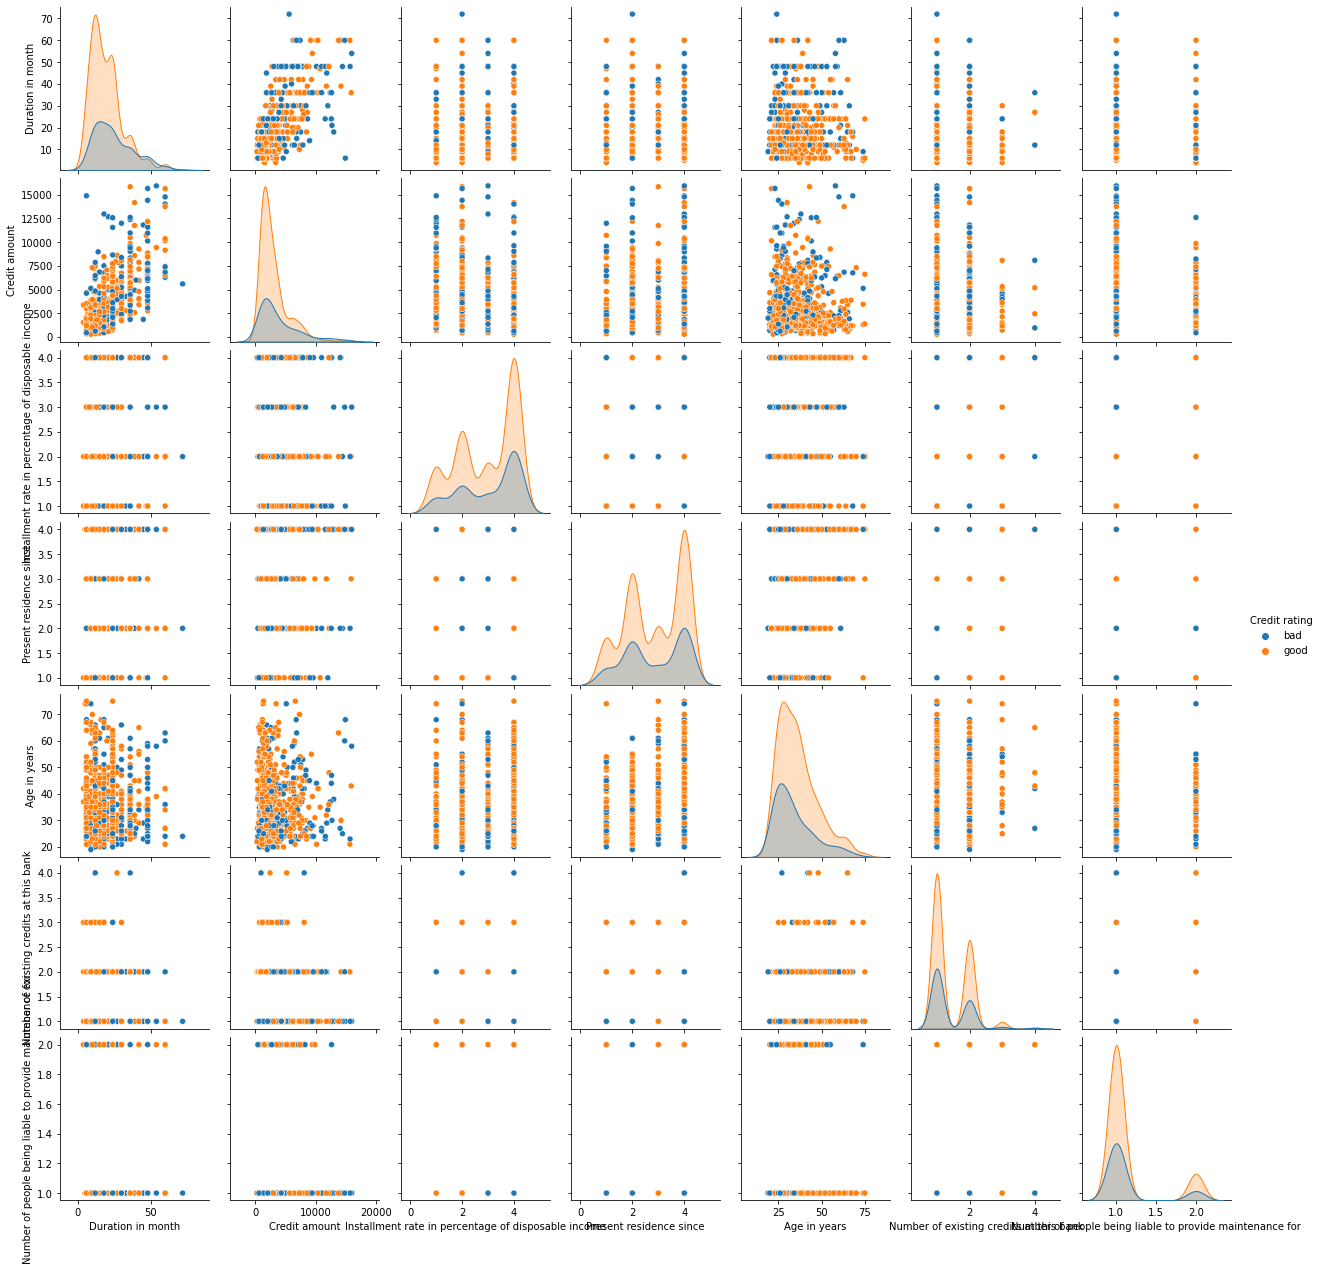

In [160]:
# Pairplotting the numerical columns
# scatter_matrix(data_train, c=y_train, figsize=(30,30), marker='o',
#                hist_kwds={'bins': 15}, s=30);

sns.pairplot(train_set, markers='o', hue='Credit rating');

In [161]:
# Correlation between features and target value
data_values_dummies.corr()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit rating
Status of existing checking account,1.000000,-0.084226,-0.131100,-0.079508,-0.063432,0.038927,-0.074184,-0.031215,-0.028672,-0.101713,...,0.019656,0.057936,-0.023378,-0.121346,0.042741,-0.021350,-0.027212,-0.049715,-0.017726,-0.317294
Duration in month,-0.084226,1.000000,0.142631,0.105305,0.624984,-0.009619,-0.031987,0.074749,-0.116029,0.006711,...,0.245655,-0.036136,0.076992,0.011950,-0.011284,0.015715,-0.023834,-0.164718,-0.138196,0.214927
Credit history,-0.131100,0.142631,1.000000,0.143938,0.113776,0.067464,0.078664,-0.024740,-0.005519,-0.008955,...,0.071606,-0.070046,0.239431,0.077417,-0.207960,0.037662,0.051849,0.018283,-0.041784,0.232157
Purpose,-0.079508,0.105305,0.143938,1.000000,0.203234,0.031698,0.026617,-0.092747,-0.035918,-0.020423,...,0.027161,0.066020,0.049489,0.028464,0.071995,0.155968,0.077245,-0.116031,0.035655,0.051311
Credit amount,-0.063432,0.624984,0.113776,0.203234,1.000000,-0.060195,0.005653,-0.271316,-0.159434,0.037921,...,0.224550,0.032716,0.045815,0.056119,0.020795,0.182750,0.017142,-0.276995,-0.050050,0.154739
Savings account/bonds,0.038927,-0.009619,0.067464,0.031698,-0.060195,1.000000,0.014129,-0.010502,0.058271,-0.006327,...,0.032131,-0.068435,0.002696,0.018343,-0.003050,-0.045329,-0.015059,0.047016,0.006803,0.014445
Present employment since,-0.074184,-0.031987,0.078664,0.026617,0.005653,0.014129,1.000000,-0.087305,0.170340,0.009477,...,-0.041518,-0.270485,0.004556,0.059077,-0.103222,0.108195,-0.073919,0.046683,0.031612,0.099046
Installment rate in percentage of disposable income,-0.031215,0.074749,-0.024740,-0.092747,-0.271316,-0.010502,-0.087305,1.000000,-0.081121,-0.014835,...,0.039353,0.058266,0.034750,-0.073955,0.021669,-0.037933,-0.071207,-0.014413,-0.090024,0.072404
Personal status and sex,-0.028672,-0.116029,-0.005519,-0.035918,-0.159434,0.058271,0.170340,-0.081121,1.000000,-0.011880,...,-0.099575,-0.186563,-0.065461,0.083146,-0.089640,-0.041234,-0.238327,0.057207,0.009204,0.042643
Other debtors / guarantors,-0.101713,0.006711,-0.008955,-0.020423,0.037921,-0.006327,0.009477,-0.014835,-0.011880,1.000000,...,-0.101378,-0.028294,-0.000955,0.036219,-0.017662,-0.003580,-0.010990,0.050996,0.107639,0.028441


In [162]:
# top 5 (positive and negative) correlations between target variable and features
# Prerequisite: categorical features like "status of existing checking account", "credit history", ... are equally interpretable between categories
# example: '... < 0 DM': 0, '0 <= ... < 200 DM': 1, 'no checking account': 2, '... >= 200 DM / salary assignments for at least 1 year': 3
#          difference between 0 (< 0 DM) and 1 (0 <= x < 200 DM) are equally valued as distance (not easy to interpret as they are not numerical value)

top10_correlation_feat = pd.DataFrame(data_values_dummies.corr().iloc[:-1, -1].abs().sort_values(ascending = False).head(5))
top10_correlation_feat

# Objectives to check in the model:
# - Does the status of the checking account influence if the credit gets a good or bad credit rating?
# - Does the credit history determine if the credit gets a good or bad credit rating?
# - Does the duration of the credit determine if the credit gets a good or bad credit rating?
# - Does the credit amount determines if the credit gets a good or bad credit rating?
# - Does the fact that the borrower is a house owner determine if the credit gets a good or bad credit rating?

,Credit rating
Status of existing checking account,0.317294
Credit history,0.232157
Duration in month,0.214927
Credit amount,0.154739
Housing,0.123815


In [163]:
# Noiseiness
data_values_dummies.describe()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.246000,20.903000,1.022000,2.414000,3271.258000,1.285000,1.561000,2.973000,0.686000,0.134000,...,1.536000,35.546000,0.233000,0.466000,1.407000,0.562000,1.155000,0.596000,0.037000,0.300000
std,0.927547,12.058814,0.991211,2.033898,2822.736876,1.133605,1.382096,1.118715,0.931811,0.445244,...,1.215805,11.375469,0.522479,0.779392,0.577654,0.821481,0.362086,0.490943,0.188856,0.458487
min,0.000000,4.000000,0.000000,0.000000,250.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,19.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000,0.000000,1365.500000,1.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,18.000000,1.000000,2.000000,2319.500000,1.000000,1.000000,3.000000,0.000000,0.000000,...,1.000000,33.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,2.000000,24.000000,1.000000,4.000000,3972.250000,1.000000,2.000000,4.000000,1.000000,0.000000,...,3.000000,42.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,72.000000,4.000000,9.000000,18424.000000,4.000000,4.000000,4.000000,3.000000,2.000000,...,3.000000,75.000000,2.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


# Analysis of Features
**Status of existing checking account**<br>
* categorical / nominal<br>
* 0 % missing<br>
* Noisiness and distribution are hard to interpret as it is a categorical value<br>
* Seems usefull, as it has the highest correlation with the target variable of all features<br>
* first and secound category are equally represented in the data, class 3 is stronger represented than class 1 + 2 and class 4 is strongly underrepresented than class 1 + 2
    * interpretation: the accounts of 400 people weren't checked, around 270 people each have 0 or less / between 0 and 200 and 50 people have more than 200

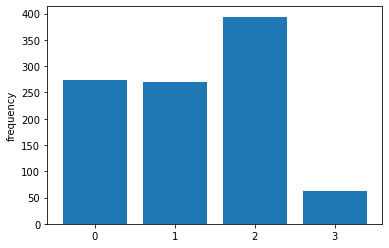

{'... < 0 DM': 0,
 '0 <= ... < 200 DM': 1,
 'no checking account': 2,
 '... >= 200 DM / salary assignments for at least 1 year': 3}

In [164]:
# Explore Feature "Status of existing checking account"

# Plot against the target variable to see relationship
fig, ax = plt.subplots()
ax.bar(range(len(data_values_dummies.iloc[:, 0].value_counts(sort = False).values)), data_values_dummies.iloc[:, 0].value_counts(sort = False).values)
plt.xticks(range(len(data_values_dummies.iloc[:, 0].value_counts(sort = False).values)))
plt.ylabel('frequency')
plt.show()
all_dict[0]

**Duration in month**<br>
* Numerical / discrete <br>
* 0 % missing<br>
* Seems usefull, as it has the third highest correlation with the target variable of all features<br>


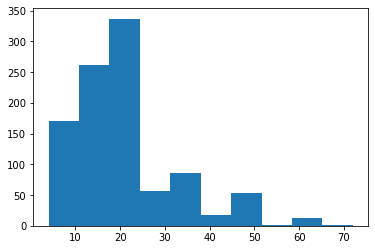

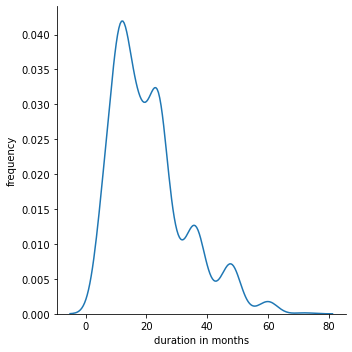

In [165]:
import scipy.stats
# Explore Feature "Duration in month"

# Plot against the target variable to see relationship
fig, ax = plt.subplots()
ax.hist(data_values_dummies.iloc[:, 1])
sns.displot(data_values_dummies.iloc[:, 1], kind = 'kde')
plt.xlabel('duration in months')
plt.ylabel('frequency')
plt.show()

**Credit history**<br>
* categorical / nominal <br>
* 0 % missing<br>
* Seems usefull, as it has the secound highest correlation with the target variable of all features<br>

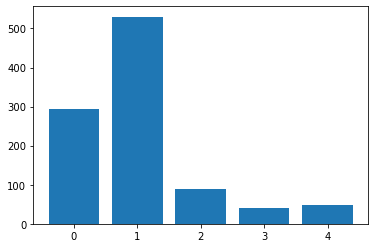

{'critical account/ other credits existing (not at this bank)': 0,
 'existing credits paid back duly till now': 1,
 'delay in paying off in the past': 2,
 'no credits taken/ all credits paid back duly': 3,
 'all credits at this bank paid back duly': 4}

In [166]:
# Explore Feature "Status of existing checking account"

# Plot against the target variable to see relationship
fig, ax = plt.subplots()
ax.bar(range(len(data_values_dummies.iloc[:, 2].value_counts(sort = False).values)), data_values_dummies.iloc[:, 2].value_counts(sort = False).values)
plt.show()
all_dict[1]